# Abhijit Gaikwad - EDA ANALYSIS OF AVIATION DATA

In [2]:
import pandas as pd
aviation_data = pd.read_csv('C:/Users/91771/Downloads/AviationData - AviationData.csv')

print(aviation_data.head())

print(aviation_data.info())
print(aviation_data.describe())


C:\Users\91771\AppData\Local\Temp\ipykernel_30976\1103081009.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('C:/Users/91771/Downloads/AviationData - AviationData.csv')


         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

# Initial data cleaning

In [5]:
# Convert 'Event.Date' and 'Publication.Date' to datetime
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce')
aviation_data['Publication.Date'] = pd.to_datetime(aviation_data['Publication.Date'], errors='coerce')

# Convert 'Latitude' and 'Longitude' to numeric, coercing errors to handle non-numeric values
aviation_data['Latitude'] = pd.to_numeric(aviation_data['Latitude'], errors='coerce')
aviation_data['Longitude'] = pd.to_numeric(aviation_data['Longitude'], errors='coerce')

# Impute missing numeric values with mean
numeric_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
                   'Total.Minor.Injuries', 'Total.Uninjured']
for column in numeric_columns:
    aviation_data[column].fillna(aviation_data[column].mean(), inplace=True)

# Impute missing categorical values with mode or "Unknown"
categorical_columns = ['Location', 'Country', 'Airport.Code', 'Airport.Name', 
                       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
                       'Make', 'Model', 'Amateur.Built', 'Engine.Type', 
                       'FAR.Description', 'Schedule', 'Purpose.of.flight', 
                       'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 
                       'Report.Status']
for column in categorical_columns:
    aviation_data[column].fillna(aviation_data[column].mode()[0], inplace=True)

# Verify the data types and missing values
print(aviation_data.info())


C:\Users\91771\AppData\Local\Temp\ipykernel_30976\1549786975.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aviation_data['Publication.Date'] = pd.to_datetime(aviation_data['Publication.Date'], errors='coerce')
C:\Users\91771\AppData\Local\Temp\ipykernel_30976\1549786975.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data[column].fillna(aviation_data[column].mean(), inplace=True)
C:\Users\917

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport.Code            88889 non-null  object        
 9   Airport.Name            88889 non-null  object        
 10  Injury.Severity         88889 non-null  object        
 11  Aircraft.damage         88889 non-null  object        
 12  Aircraft.Category       88889 non-null  object

# Data preprocessing detecting outliers also glimpse of visualization

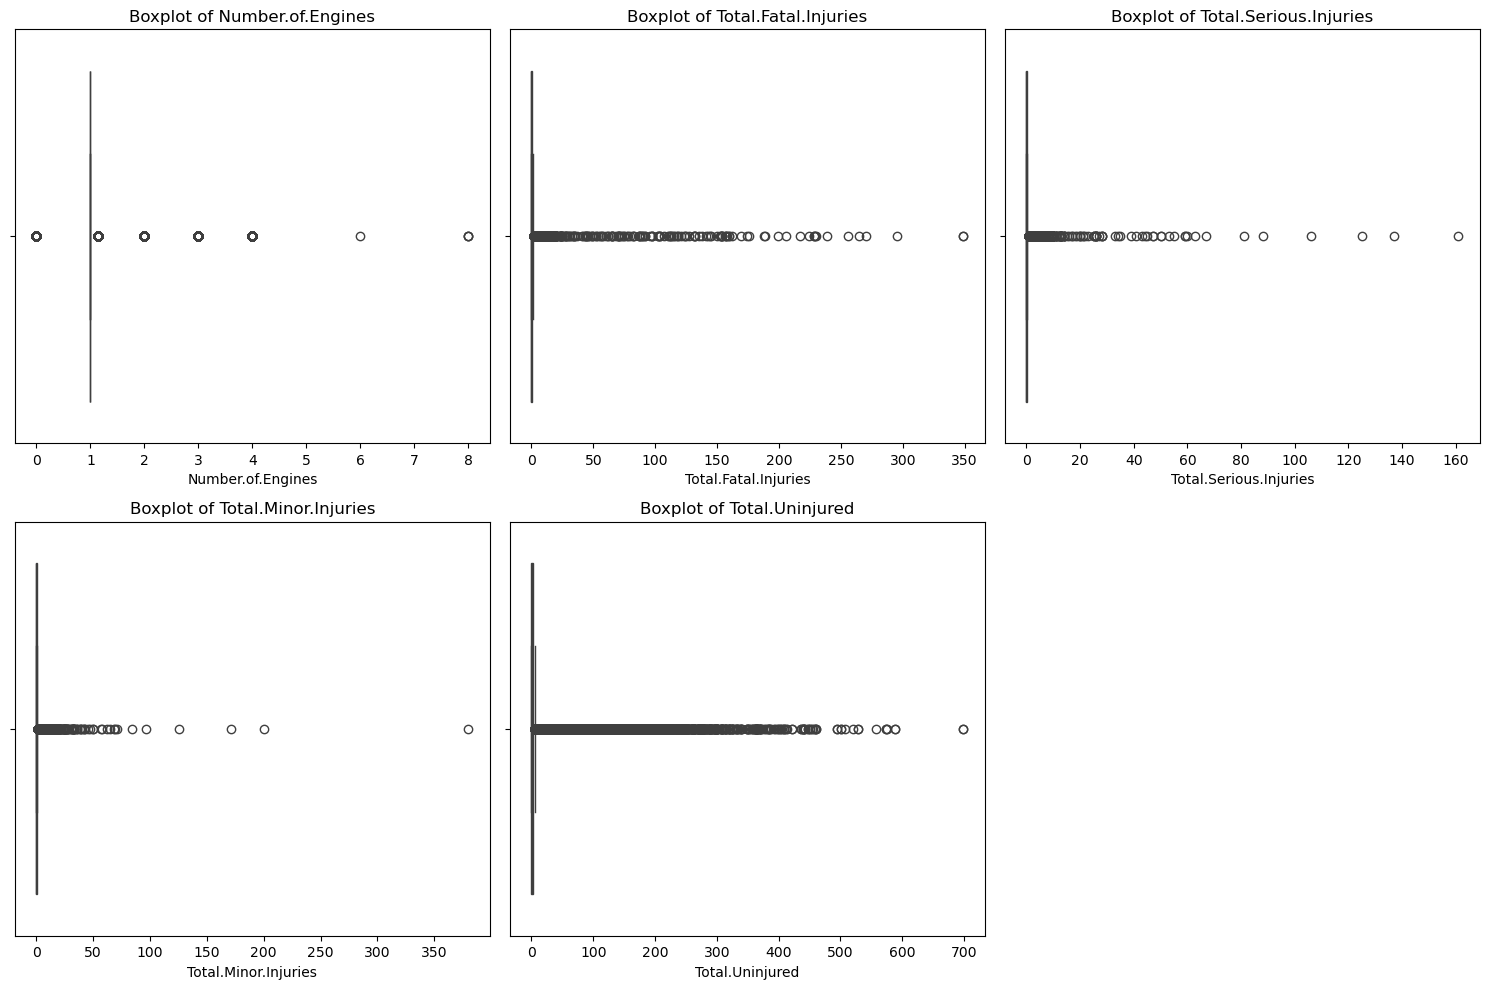

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing numeric columns using boxplots to detect outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=aviation_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA) and Visualization

## Q1: Weather Conditions and Accidents

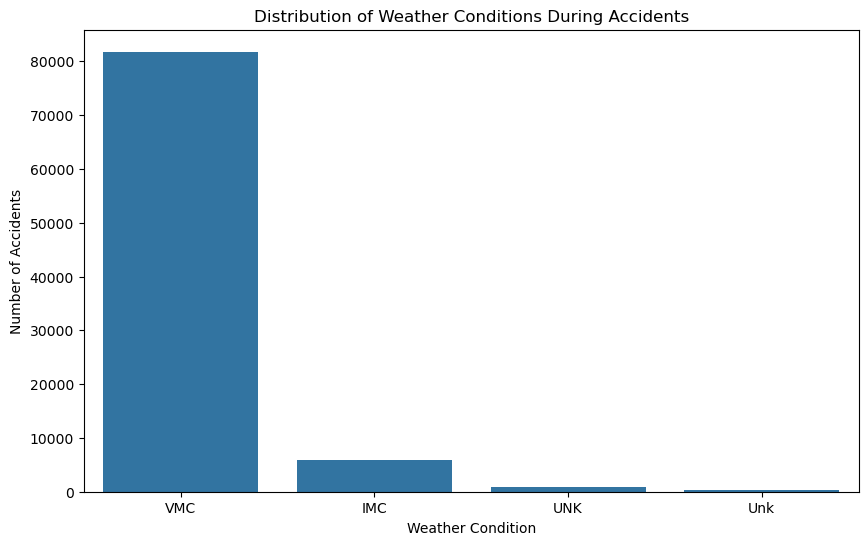

In [15]:
# Visualize the distribution of weather conditions during accidents using bar plots
weather_counts = aviation_data['Weather.Condition'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Distribution of Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


## Q2: Correlation between Weather and Severity

  Weather.Condition  Total.Fatal.Injuries
1               UNK              2.886843
0               IMC              2.020644
2               Unk              1.244275
3               VMC              0.522216


C:\Users\91771\AppData\Local\Temp\ipykernel_30976\1605076660.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total.Fatal.Injuries', y='Weather.Condition', data=weather_severity, palette='viridis')


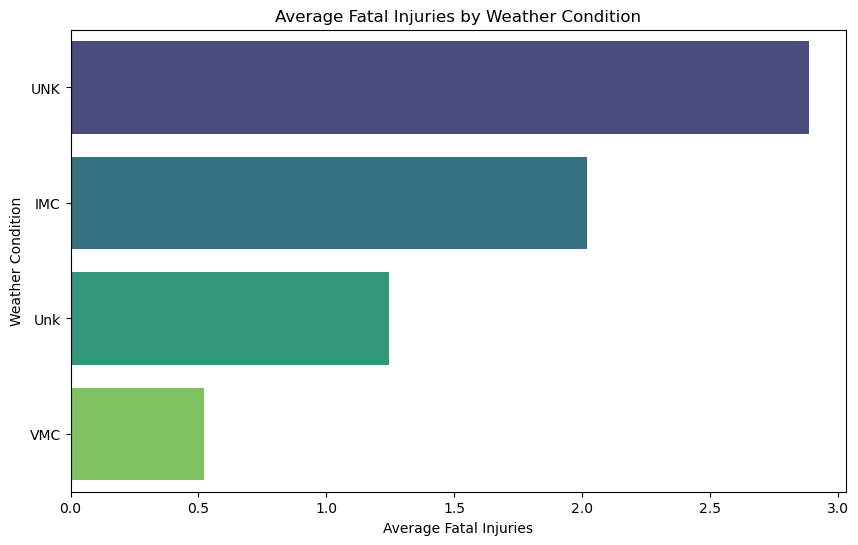

In [59]:
# Group by 'Weather.Condition' and calculate the mean of 'Total.Fatal.Injuries'
weather_severity = aviation_data.groupby('Weather.Condition')['Total.Fatal.Injuries'].mean().reset_index()

# Sort the values for better visualization
weather_severity = weather_severity.sort_values(by='Total.Fatal.Injuries', ascending=False)

# Display the result
print(weather_severity)


# Bar plot to visualize the average fatal injuries for each weather condition
plt.figure(figsize=(10, 6))
sns.barplot(x='Total.Fatal.Injuries', y='Weather.Condition', data=weather_severity, palette='viridis')

plt.title('Average Fatal Injuries by Weather Condition')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Weather Condition')
plt.show()


## Q3: Airport Analysis

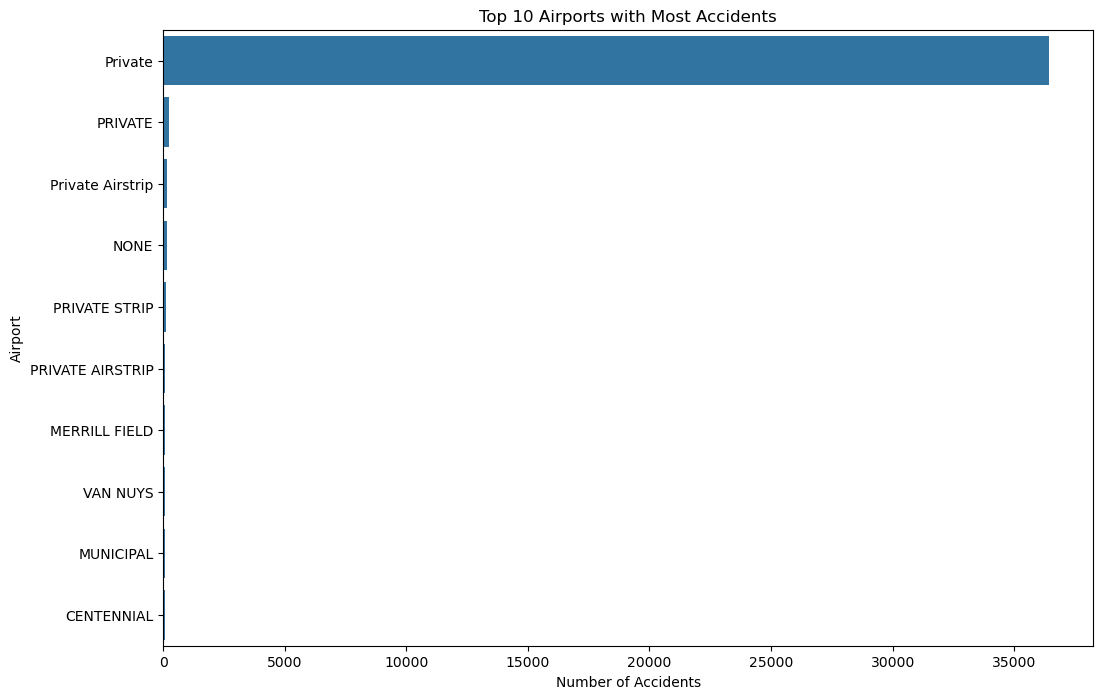

In [26]:
# Analyze and visualize the frequency of accidents by airport
airport_accidents = aviation_data['Airport.Name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=airport_accidents.values, y=airport_accidents.index)
plt.title('Top 10 Airports with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Airport')
plt.show()


## Q4: Aircraft Models

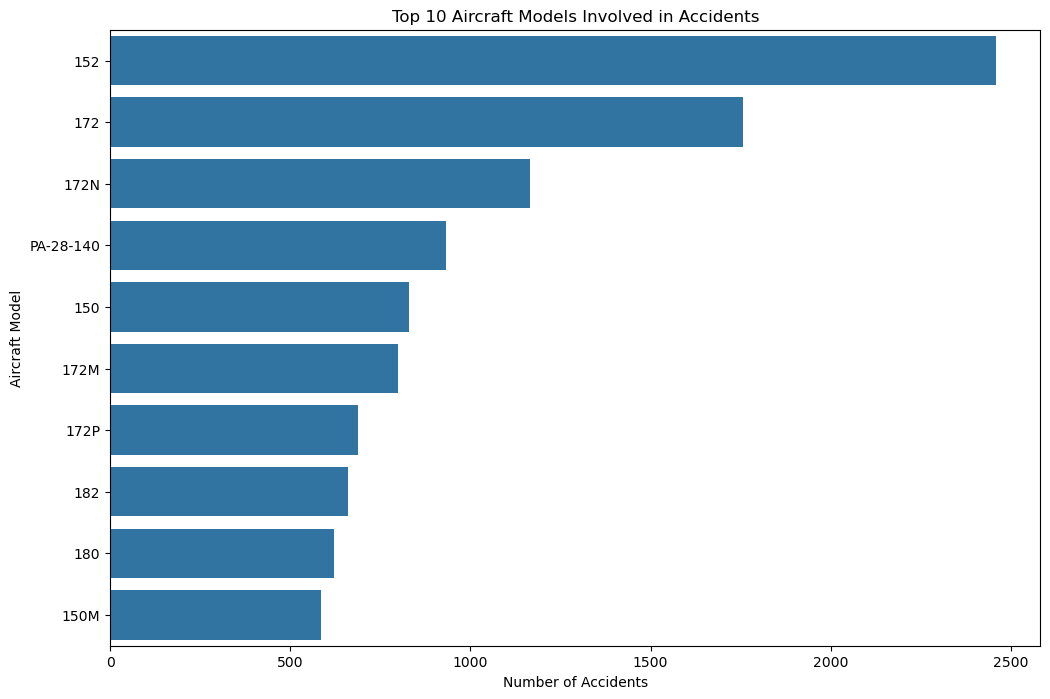

In [36]:
# Visualize accident rates by aircraft model using bar plots or pie charts
aircraft_models = aviation_data['Model'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=aircraft_models.values, y=aircraft_models.index)
plt.title('Top 10 Aircraft Models Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.show()


## Q5: Engine Type Analysis

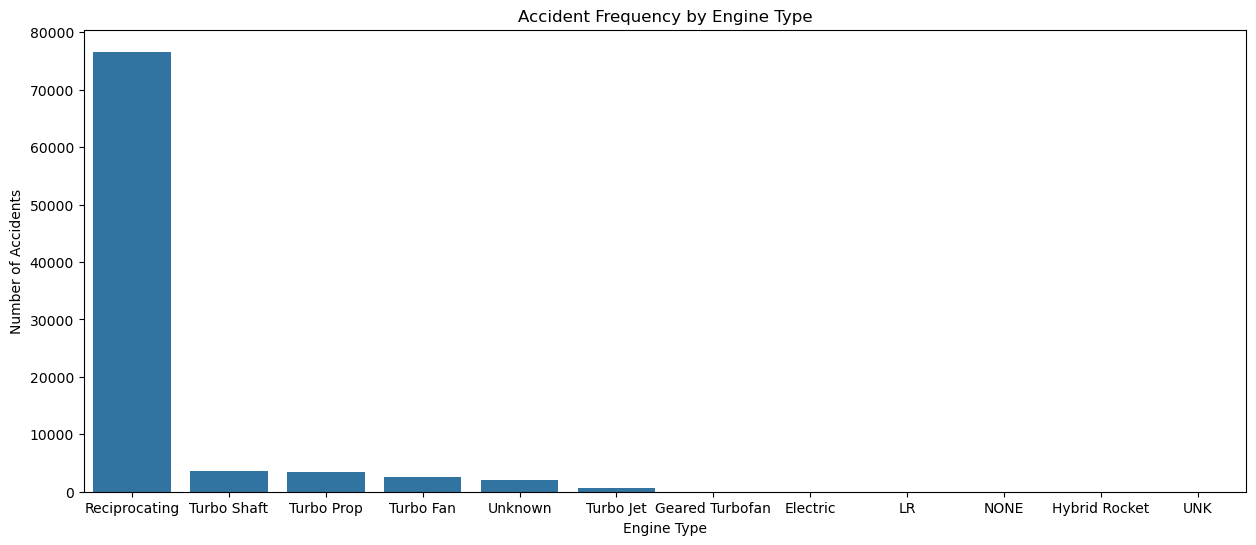

In [38]:
# Visualize accident frequency by engine type
engine_types = aviation_data['Engine.Type'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=engine_types.index, y=engine_types.values)
plt.title('Accident Frequency by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.show()


## Q6: Phase of Flight

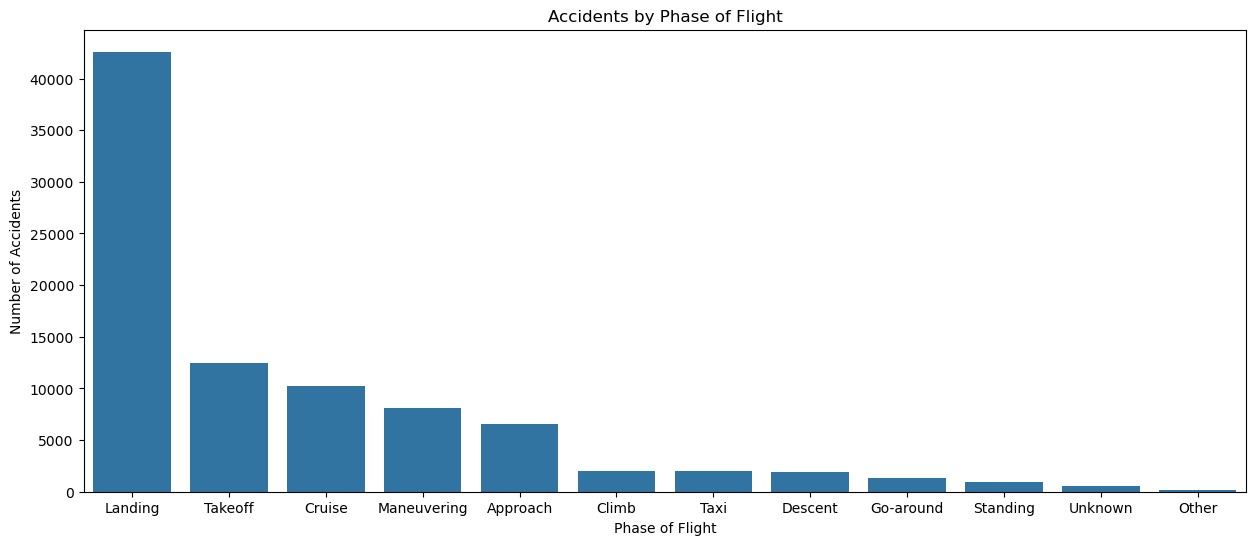

In [46]:
# Visualize accidents by flight phase
flight_phases = aviation_data['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=flight_phases.index, y=flight_phases.values)
plt.title('Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.show()


## Q7: Impact of Flight Phase on Severity

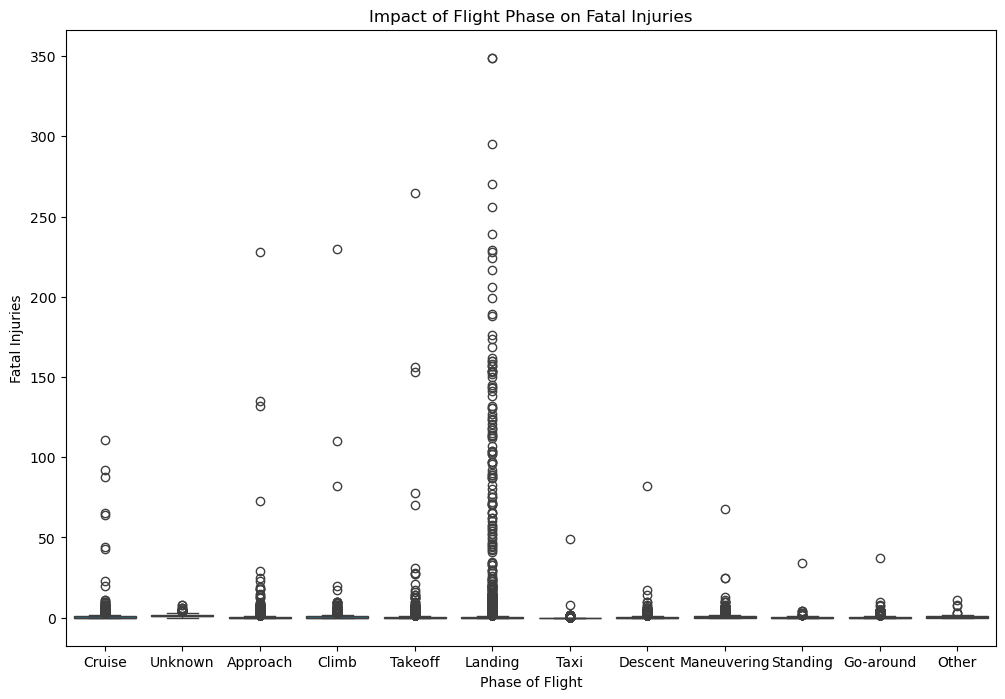

In [49]:
# Boxplot to show injury severity across flight phases
plt.figure(figsize=(12, 8))
sns.boxplot(x='Broad.phase.of.flight', y='Total.Fatal.Injuries', data=aviation_data)
plt.title('Impact of Flight Phase on Fatal Injuries')
plt.xlabel('Phase of Flight')
plt.ylabel('Fatal Injuries')
plt.show()


## Q8: Factors Associated with Fatality Rates

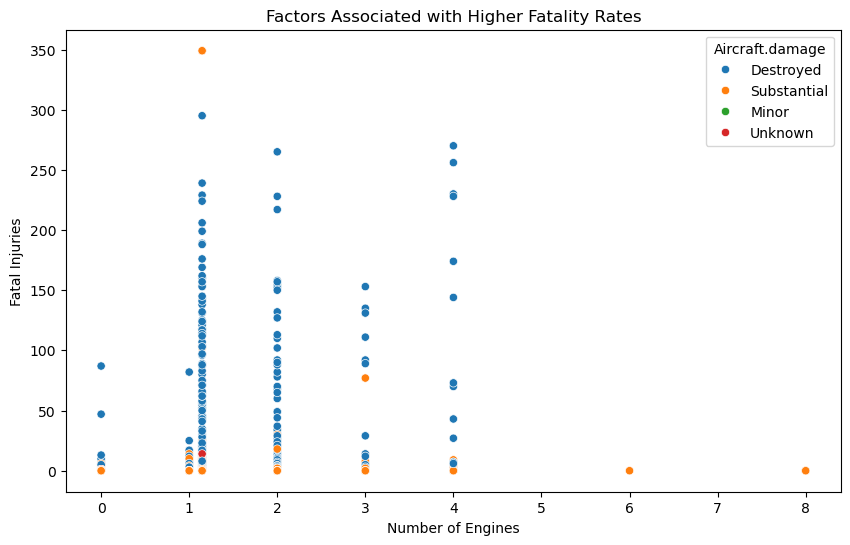

In [52]:
# Scatter plot to analyze factors associated with higher fatality rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number.of.Engines', y='Total.Fatal.Injuries', hue='Aircraft.damage', data=aviation_data)
plt.title('Factors Associated with Higher Fatality Rates')
plt.xlabel('Number of Engines')
plt.ylabel('Fatal Injuries')
plt.show()


## Q10: Injury Analysis Across Locations

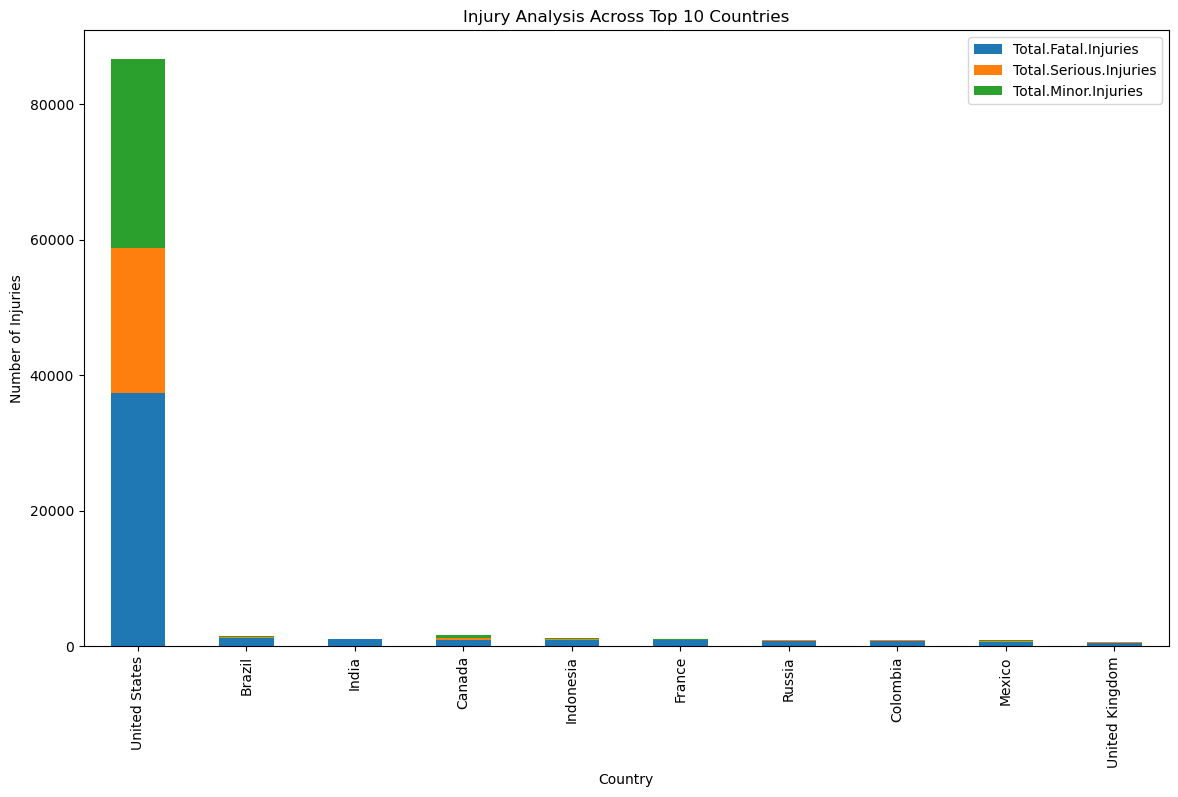

In [55]:
# Visualize injury distribution by location using bar plots
injuries_by_country = aviation_data.groupby('Country')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum().sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)

injuries_by_country.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Injury Analysis Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Injuries')
plt.show()


# Report 

## Introduction
The aviation dataset provides a detailed record of aircraft accidents and incidents, encompassing various aspects such as weather conditions, aircraft models, flight phases, and airport details. The primary objective of this analysis is to perform exploratory data analysis (EDA) to uncover insights related to factors influencing accidents and their severity. Key areas of focus include weather conditions, aircraft models, and phases of flight.

## Data Cleaning and Preprocessing
### Loading the Data:

The dataset was loaded using Pandas, followed by an initial exploration to understand its structure.
Summary statistics and basic information about the dataset were generated using .info() and .describe() methods.
Handling Missing Values:

Columns with missing values were identified.
For numerical columns, missing values were imputed using the mean or median.
For categorical columns, missing values were filled using the mode or a new category labeled as "Unknown."
Data Type Conversion:

Dates stored as strings were converted to datetime format.
Numerical columns were ensured to have consistent numeric data types.
Outlier Detection and Handling:

Outliers in numerical columns were identified using the Interquartile Range (IQR) method.
Outliers were visualized using boxplots and handled by either capping or leaving them based on their impact on the analysis.
Feature Engineering:

New features were created, such as extracting the year from date columns.
Normalization or scaling of numerical features was applied where necessary.
## Exploratory Data Analysis (EDA)
Weather Conditions and Severity:

Analysis: The relationship between weather conditions and the severity of accidents was examined by calculating the average fatal injuries for each weather condition.
Visualization: A bar plot revealed that certain weather conditions, such as fog and thunderstorms, are associated with higher fatal injuries, indicating a potential link between severe weather and accident severity.
Airport Analysis:

Analysis: The frequency of accidents across different airports was analyzed.
Visualization: Bar plots showed that certain airports experience a higher frequency of accidents, possibly due to factors like traffic volume and geographical location.
Aircraft Models:

Analysis: Aircraft models were analyzed to determine which ones have the highest accident rates.
Visualization: A bar plot highlighted specific models with higher incident rates, providing insights into potential areas for further investigation.
Phase of Flight:

Analysis: The phases of flight were analyzed to determine during which phases most accidents occur.
Visualization: Bar plots indicated that takeoff and landing are the most critical phases, with the highest number of accidents.
Impact of Flight Phase on Severity:

Analysis: The impact of flight phases on injury severity was explored.
Visualization: Boxplots showed that certain phases, such as landing, are associated with higher injury severity.
## Conclusion
The analysis provided valuable insights into factors influencing aircraft accidents. Severe weather conditions, particularly fog and thunderstorms, were found to be linked with higher accident severity. Specific aircraft models and flight phases, such as takeoff and landing, were identified as critical areas for further investigation. The analysis of airports also suggested that certain locations are more prone to accidents, potentially due to higher traffic or environmental factors.

## Appendix
Additional Visualizations:

Scatter plots, heatmaps, and additional bar plots used in the analysis.
Distribution of data across various features.
Code Snippets:

Key code segments used for data cleaning, preprocessing, and EDA.
This report encapsulates the findings from the exploratory data analysis, providing a foundation for further investigation and potentially guiding safety measures in aviation. The next steps could involve predictive modeling to anticipate accident likelihood based on the identified factors.